### Data Analysis of Disease Outbreaks
+ ebola
+ covid19
+ sars



#### Data sources
- https://github.com/imdevskp
- https://github.com/reconhub/outbreaks


In [1]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load GeoSpatial Pkgs
import geopandas as gpd
import descartes

In [4]:
# Load Dataset
covid = pd.read_csv("dataset/coronavirus_dataset_20200403-142011.csv")
ebola = pd.read_csv("dataset/pandemic_ebola_dataset.csv")
sars = pd.read_csv("dataset/pandemic_sars_dataset.csv")

In [5]:
# Check Columns
print(covid.columns)
print("===============")
print(ebola.columns)
print("===============")
print(sars.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')
Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Lat', 'Long'], dtype='object')
Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Lat',
       'Long'],
      dtype='object')


In [6]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


### Analysis of Ebola
+ How many confirmed/death/recovered cases?
+ Which countries were the most affected?
+ Top 10 countries (largest/smallest)
+ Which day

In [7]:
ebola.head()

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [9]:
# Number of Cases By Per Day
ebola_per_day = ebola.groupby('Date')['Confirmed','Deaths'].max()

In [10]:
ebola_per_day

,Confirmed,Deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,508.0
2014-09-12,1287.0,498.0
2014-09-16,1464.0,563.0
...,...,...
2015-12-17,8704.0,3589.0
2015-12-22,8704.0,3589.0
2015-12-23,8704.0,3589.0


In [11]:
# Descriptive Stats
ebola_per_day.describe()

,Confirmed,Deaths
count,259.000000,259.000000
mean,7883.671815,3103.810811
std,1787.114320,882.598954
min,935.000000,7.000000
25%,8135.000000,3038.500000
50%,8614.000000,3546.000000
75%,8697.000000,3587.000000
max,8704.000000,3858.000000


In [13]:
# Max and Min Number of Cases
print("Max Num of Confirmed Cases: ",ebola_per_day['Confirmed'].max())
print("Min Num of Confirmed Cases: ",ebola_per_day['Confirmed'].min())

Max Num of Confirmed Cases:  8704.0
Min Num of Confirmed Cases:  935.0


In [15]:
# Day with the Min and Max Cases
print("Day with the Max Num of Confirmed Cases: ",ebola_per_day['Confirmed'].idxmax())
print("Day with the Min Num of Confirmed Cases: ",ebola_per_day['Confirmed'].idxmin())

Day with the Max Num of Confirmed Cases:  2015-09-15
Day with the Min Num of Confirmed Cases:  2014-08-29


In [16]:
# Number of Cases Per Country
ebola.groupby("Country/Region")['Confirmed','Deaths'].max()

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


In [17]:
ebola.shape

(2485, 6)

In [19]:
# Number of Countries were affected
ebola["Country/Region"].unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal', 'US',
       'Spain', 'Mali', 'United Kingdom', 'Italy'], dtype=object)

In [20]:
len(ebola["Country/Region"].unique())

10

In [26]:
# Top Countries Affected
grp_countries_ebola = ebola.groupby("Country/Region")['Confirmed','Deaths'].max()

In [29]:
# Based on Confirmed Cases
grp_countries_ebola.nlargest(5,'Confirmed')

,Confirmed,Deaths
Country/Region,,
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Liberia,3153.0,3858.0
Nigeria,19.0,7.0
Mali,7.0,5.0


In [30]:
# Based on Death Cases
grp_countries_ebola.nlargest(5,'Deaths')

,Confirmed,Deaths
Country/Region,,
Liberia,3153.0,3858.0
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Nigeria,19.0,7.0
Mali,7.0,5.0


#### Narrative
+ Based on the countries affected Sierra Leone and Liberia were the most
affected
+ Sierra Leone had the Highest number of confirmed cases but their were second to Liberia 
for the death cases
+ This may be due to they having a better treatment and management protocol than Liberia

In [21]:
# Distribution of Ebola by Value Counts
ebola["Country/Region"].value_counts()

Liberia           365
Sierra Leone      259
Guinea            259
Nigeria           255
Senegal           254
US                245
Spain             243
Mali              243
United Kingdom    221
Italy             141
Name: Country/Region, dtype: int64

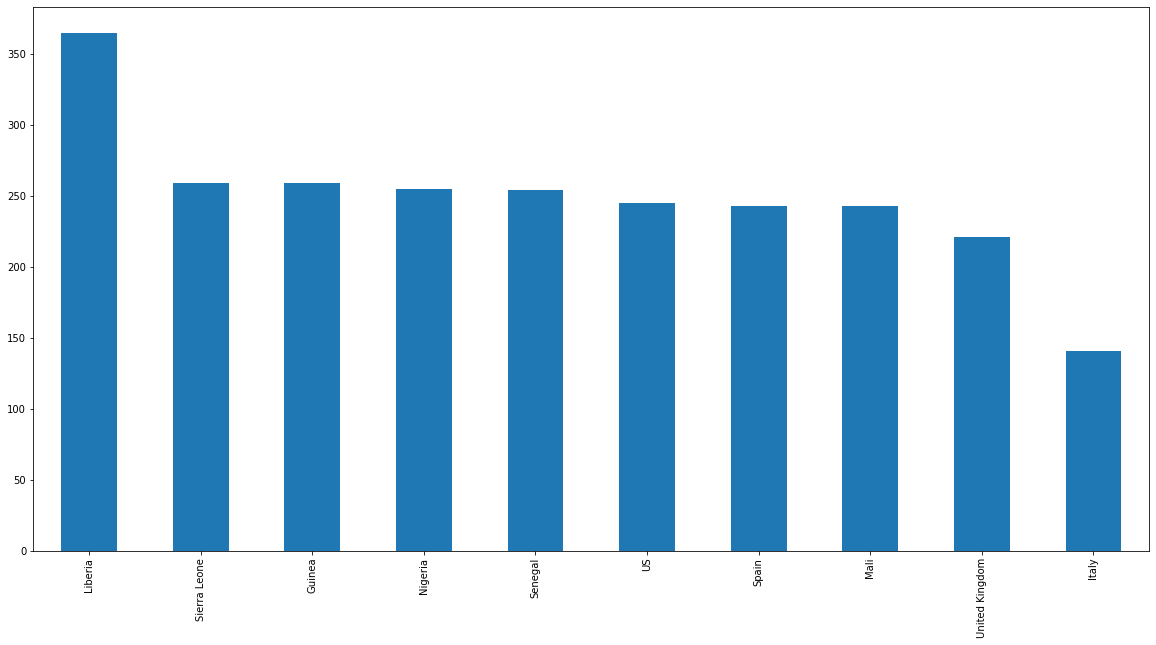

In [22]:
# Plot of Value Counts
ebola["Country/Region"].value_counts().plot(kind='bar',figsize=(20,10))

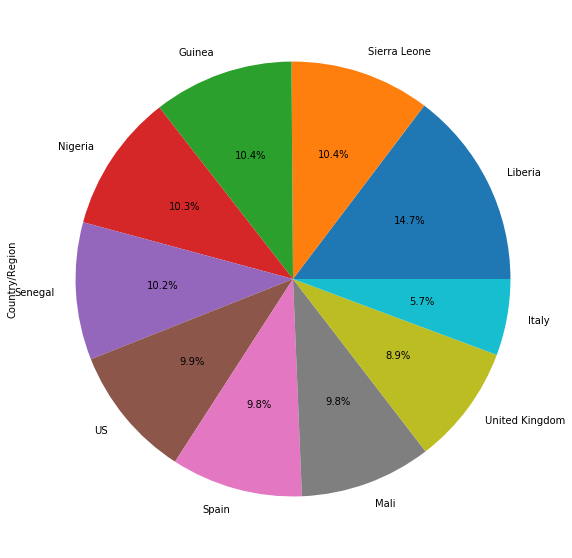

In [25]:
# Plot of Value Counts
plt.figure(figsize=(20,10))
ebola["Country/Region"].value_counts().plot.pie(autopct="%1.1f%%")

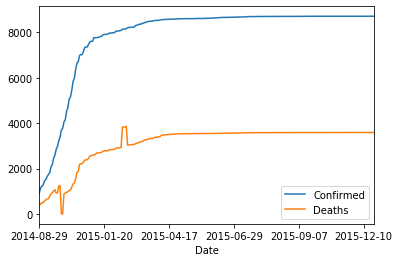

In [31]:
### Time Series
ebola_per_day.plot(kind='line')

In [ ]:
# Geo Distribution

In [34]:
# Convert Data To GeoData
gdf_ebola = gpd.GeoDataFrame(ebola,geometry=gpd.points_from_xy(ebola['Long'],ebola['Lat']))

In [35]:
gdf_ebola.head()

,Country/Region,Date,Confirmed,Deaths,Lat,Long,geometry
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600,POINT (-9.69660 9.94560)
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300,POINT (8.67530 9.08200)
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889,POINT (-11.77989 8.46056)


(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

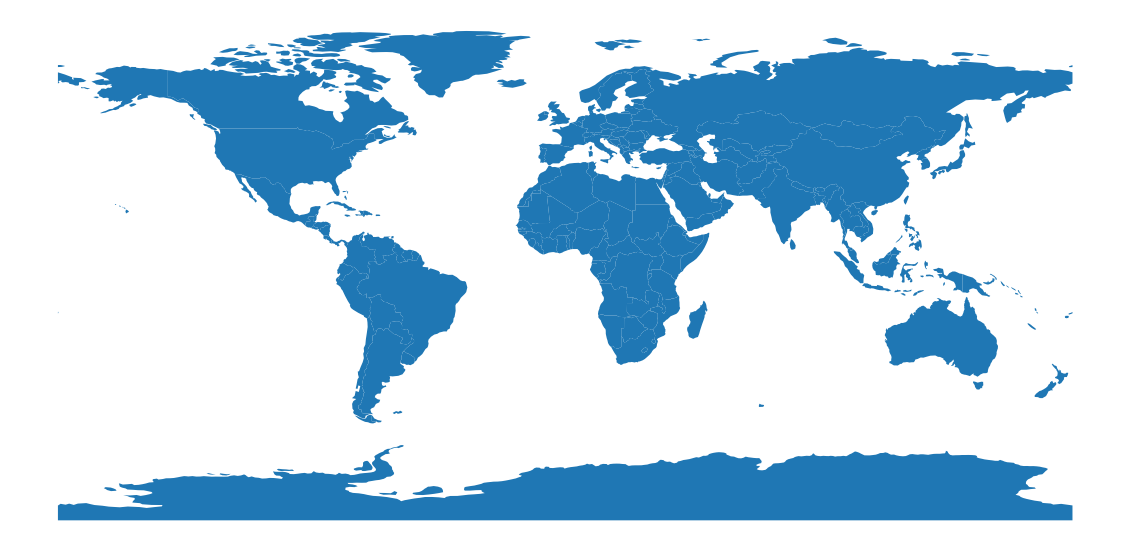

In [36]:
# Overlap with World map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(20,10))
ax.axis('off')

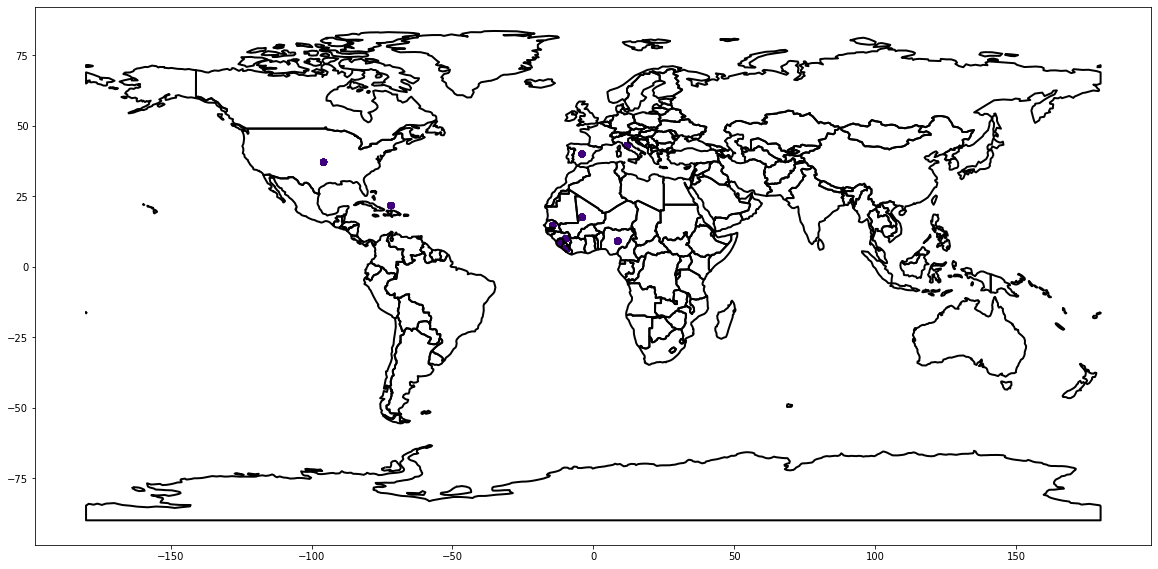

In [37]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_ebola.plot(cmap="Purples",ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [ ]:
###  Analysing Sars

In [39]:
# Number of Cases By Per Day
sars_per_day = sars.groupby('Date')['Confirmed','Recovered','Deaths'].max()

In [41]:
# Max and Min Number of Cases
print("Max Num of Confirmed Cases: ",sars_per_day['Confirmed'].max())
print("Min Num of Confirmed Cases: ",sars_per_day['Confirmed'].min())
# Day with the Min and Max Cases
print("Day with the Max Num of Confirmed Cases: ",sars_per_day['Confirmed'].idxmax())
print("Day with the Min Num of Confirmed Cases: ",sars_per_day['Confirmed'].idxmin())

Max Num of Confirmed Cases:  5329
Min Num of Confirmed Cases:  95
Day with the Max Num of Confirmed Cases:  2003-06-03
Day with the Min Num of Confirmed Cases:  2003-03-17


In [43]:
sars_per_day.describe()

,Confirmed,Recovered,Deaths
count,96.000000,96.000000,96.000000
mean,3588.989583,2252.885417,206.645833
std,1994.065493,1806.733289,132.095020
min,95.000000,0.000000,2.000000
25%,1390.750000,1075.250000,62.500000
50%,4948.500000,1656.500000,243.500000
75%,5327.000000,4213.000000,340.750000
max,5329.000000,4941.000000,348.000000


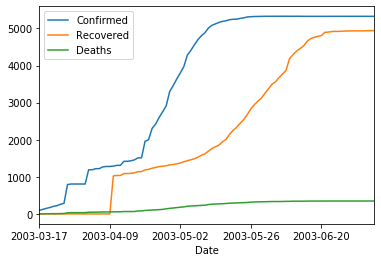

In [44]:
### Time Series
sars_per_day.plot(kind='line')

In [45]:
sars["Country/Region"].value_counts()

China             154
Canada             96
Hong Kong          96
Germany            96
Thailand           96
Singapore          96
United Kingdom     95
Vietnam            95
Taiwan*            95
Switzerland        94
US                 94
Ireland            92
Italy              92
France             90
Romania            87
Spain              86
Brazil             81
Malaysia           79
Kuwait             75
South Africa       74
Indonesia          72
Sweden             72
Philippines        72
Mongolia           69
India              64
Korea, South       59
New Zealand        56
Colombia           53
Finland            51
Russia             31
Bulgaria           20
Japan              19
Australia          17
Poland             10
Belgium             5
Slovenia            5
Name: Country/Region, dtype: int64

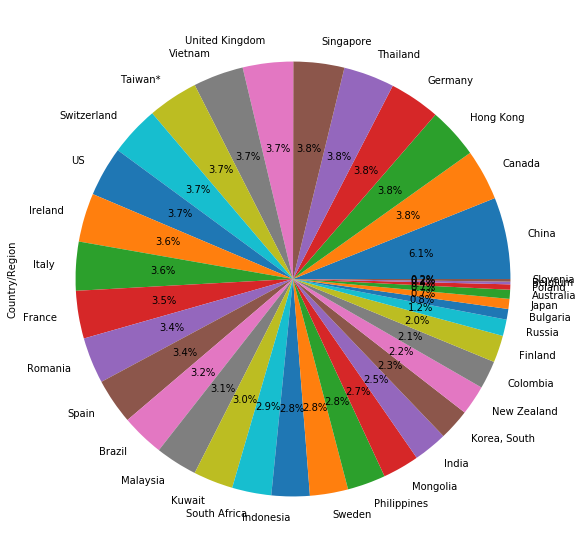

In [46]:
# Plot of Value Counts
plt.figure(figsize=(20,10))
sars["Country/Region"].value_counts().plot.pie(autopct="%1.1f%%")

In [47]:
# Top Countries Affected
grp_countries_sars = sars.groupby("Country/Region")['Confirmed','Recovered','Deaths'].max()

In [48]:
grp_countries_sars

,Confirmed,Recovered,Deaths
Country/Region,,,
Australia,6,6,0
Belgium,1,0,0
Brazil,3,2,0
Bulgaria,1,0,0
Canada,252,194,38
China,5329,4941,348
Colombia,1,1,0
Finland,1,1,0
France,7,6,1


In [49]:
# Based on Confirmed Cases
grp_countries_sars.nlargest(5,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
US,220,67,0


In [50]:
# Based on Confirmed Cases
grp_countries_sars.nlargest(5,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
Singapore,206,172,32


In [51]:
# Convert Data To GeoData
gdf_sars = gpd.GeoDataFrame(sars,geometry=gpd.points_from_xy(sars['Long'],sars['Lat']))

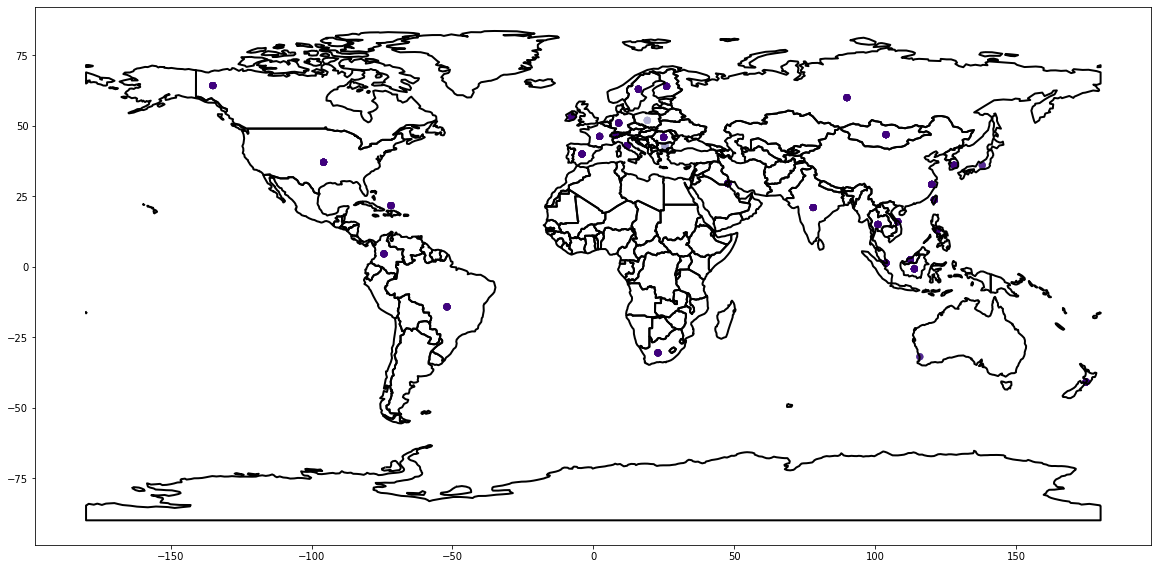

In [52]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_sars.plot(cmap="Purples",ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [ ]:
### Map The 2 Diseas Over 

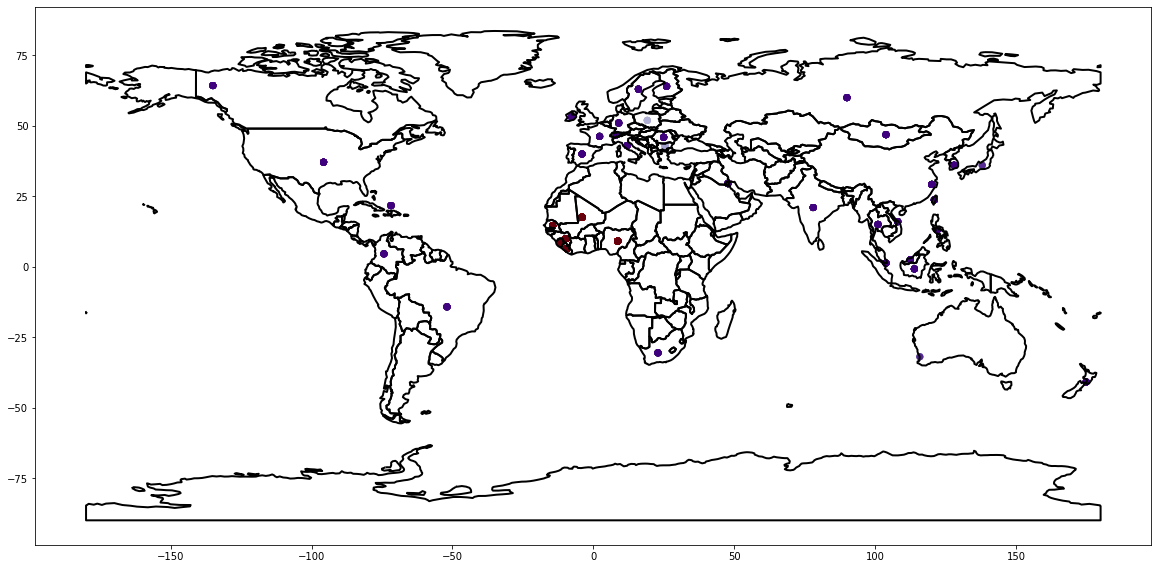

In [54]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_ebola.plot(cmap="Reds",ax=ax)
gdf_sars.plot(cmap="Purples",ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [55]:
# Convert Data To GeoData
gdf_covid = gpd.GeoDataFrame(covid,geometry=gpd.points_from_xy(covid['Long'],covid['Lat']))

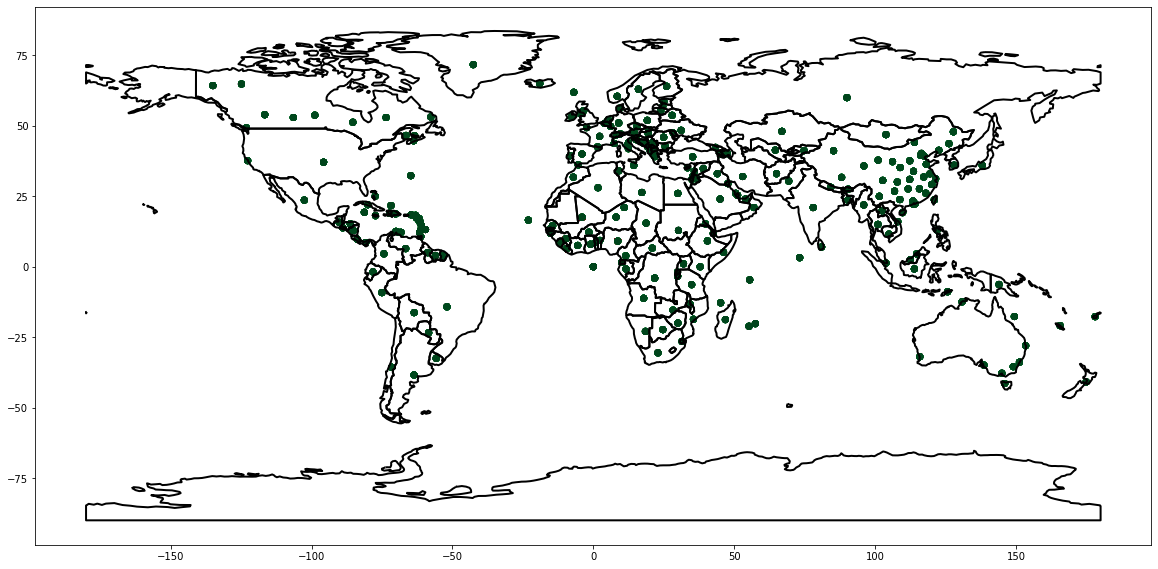

In [57]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_ebola.plot(cmap="Reds",ax=ax)
gdf_sars.plot(cmap="Purples",ax=ax)
gdf_covid.plot(cmap="Greens",ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

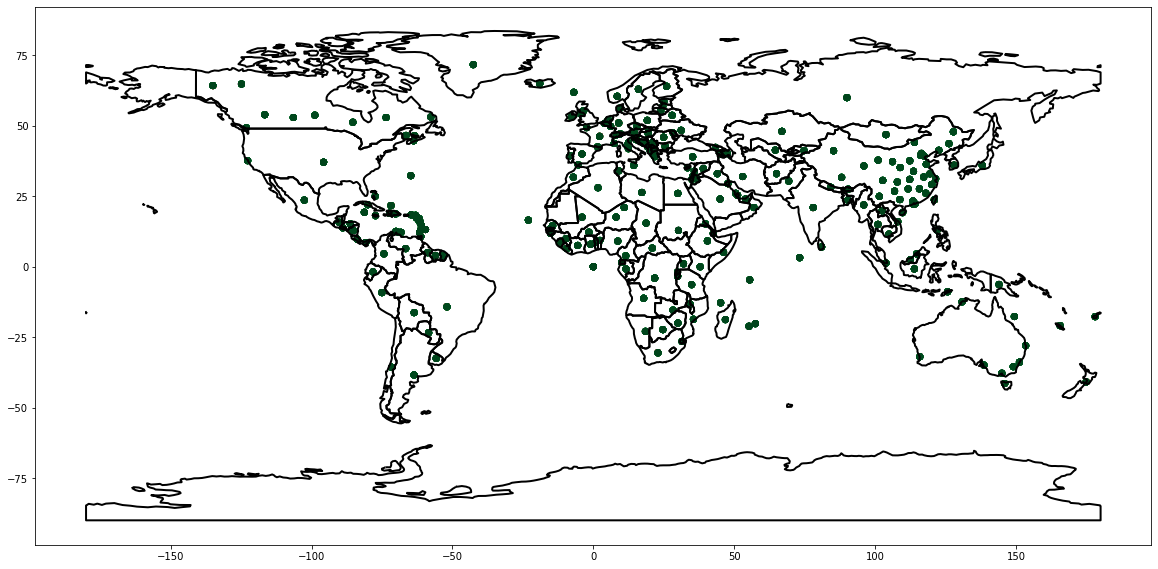

In [59]:
fig,ax = plt.subplots(figsize=(20,10))
# gdf_ebola.plot(cmap="Reds",ax=ax)
gdf_sars.plot(cmap="Reds",ax=ax)
gdf_covid.plot(cmap="Greens",ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

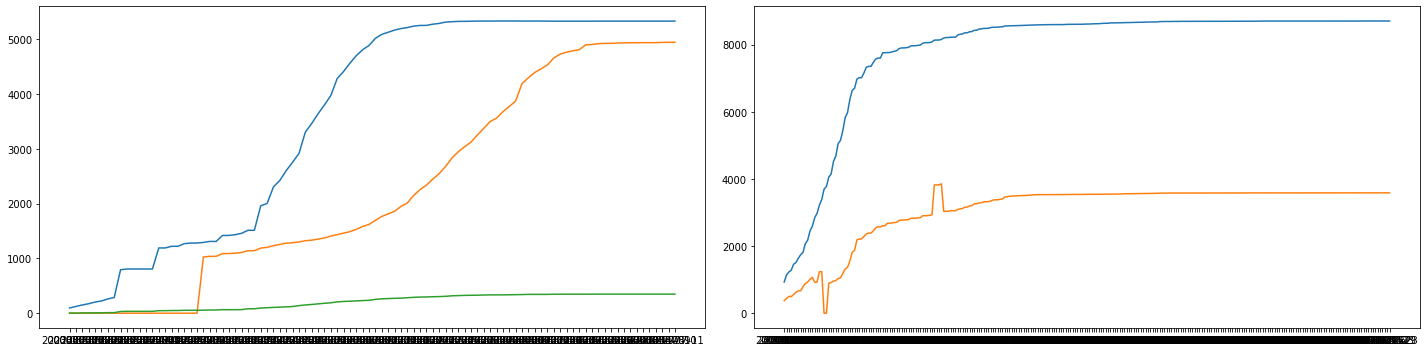

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
fig.tight_layout()

In [64]:
# Number of Cases By Per Day
covid_per_day = covid.groupby('Date')['Confirmed','Recovered','Deaths'].max()

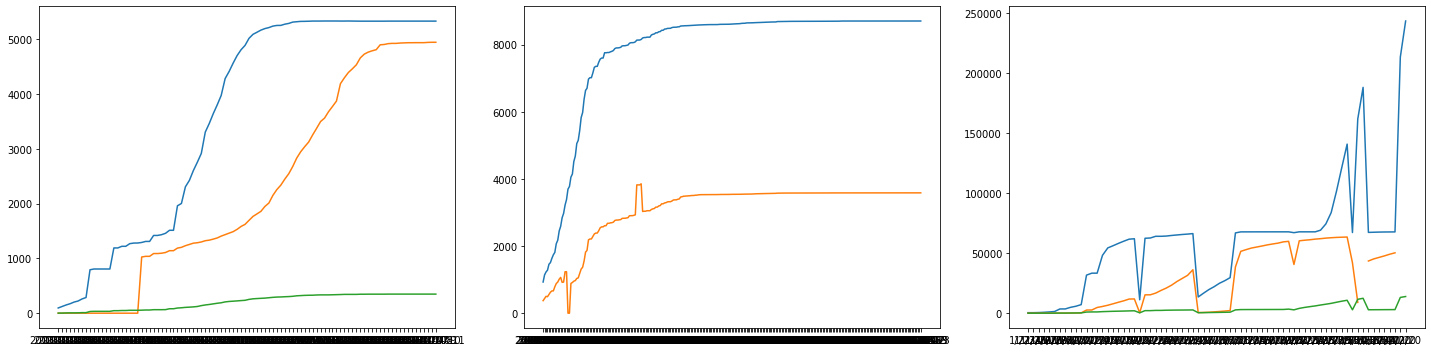

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)
fig.tight_layout()

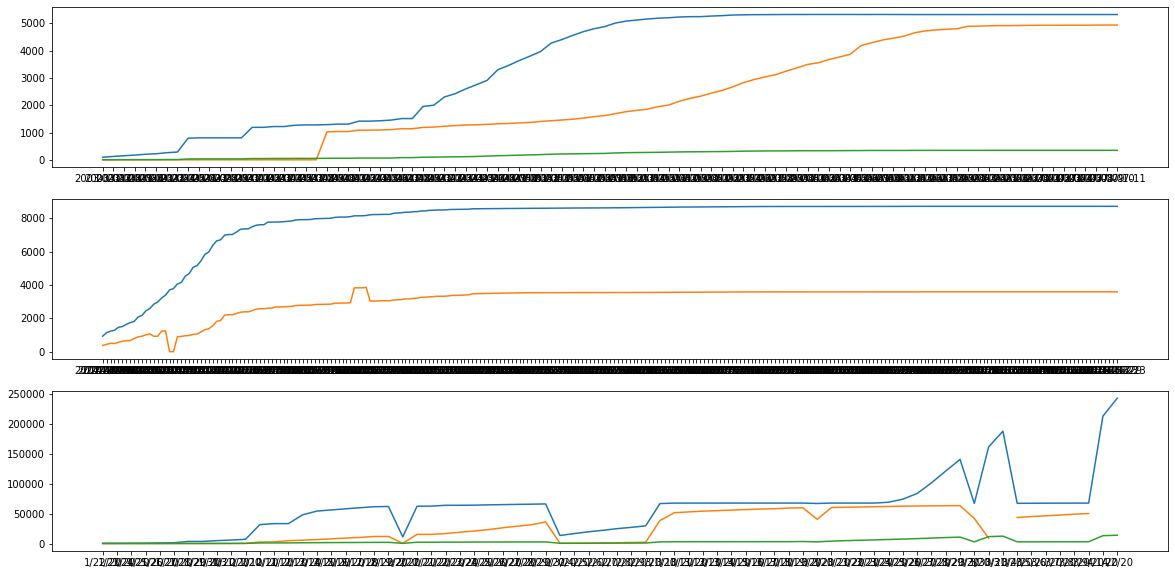

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)
fig.tight_layout()

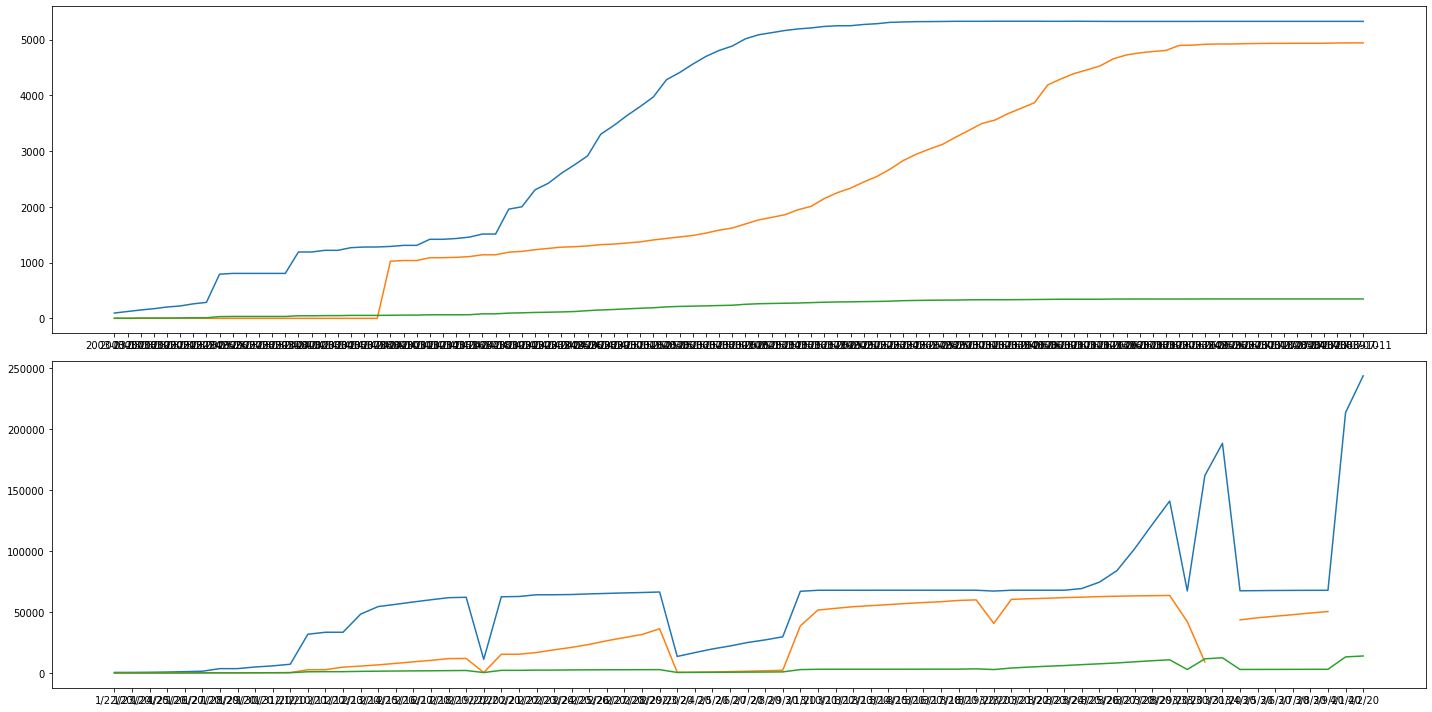

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
axes[0].plot(sars_per_day)
axes[1].plot(covid_per_day)
fig.tight_layout()